## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95


In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

MODEL_CKPT = [ModelCheckpoint(filepath="./bestTrue_weightsTrue.h5", monitor="val_loss", save_best_only=True, save_weights_only=True), 
 ModelCheckpoint(filepath="./bestTrue_weightsFalse.h5", monitor="val_loss", save_best_only=True, save_weights_only=False), 
 ModelCheckpoint(filepath="./bestFalse_weightsTrue.h5", monitor="val_loss", save_best_only=False, save_weights_only=True), 
 ModelCheckpoint(filepath="./bestFalse_weightsFalse.h5", monitor="val_loss", save_best_only=False, save_weights_only=False)]
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for checkpoint in MODEL_CKPT:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[checkpoint]
             )

     # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "model checkpoint -%s" % (str(checkpoint))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 7s 140us/step - loss: 0.5759 - accuracy: 0.8299 - val_loss: 1.6066 - val_accuracy: 0.4900
Epoch 47/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.5599 - accuracy: 0.8370 - val_loss: 1.6289 - val_accuracy: 0.4851
Epoch 48/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.5430 - accuracy: 0.8448 - val_loss: 1.6666 - val_accuracy: 0.4871
Epoch 49/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.5249 - accuracy: 0.8503 - val_loss: 1.6491 - val_accuracy: 0.4902
Epoch 50/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.5096 - accuracy: 0.8568 - val_loss: 1.6979 - val_accuracy: 0.4821
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
____________________________________________________

50000/50000 [==============================] - 7s 138us/step - loss: 0.6506 - accuracy: 0.7991 - val_loss: 1.5683 - val_accuracy: 0.4912
Epoch 42/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.6322 - accuracy: 0.8051 - val_loss: 1.5635 - val_accuracy: 0.4985
Epoch 43/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.6118 - accuracy: 0.8128 - val_loss: 1.5761 - val_accuracy: 0.4943
Epoch 44/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.5945 - accuracy: 0.8202 - val_loss: 1.6096 - val_accuracy: 0.4931
Epoch 45/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.5779 - accuracy: 0.8264 - val_loss: 1.6176 - val_accuracy: 0.4873
Epoch 46/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.5602 - accuracy: 0.8345 - val_loss: 1.6087 - val_accuracy: 0.4953
Epoch 47/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.5433 - accuracy: 0.8406 - val_loss:

50000/50000 [==============================] - 7s 137us/step - loss: 0.7445 - accuracy: 0.7629 - val_loss: 1.5358 - val_accuracy: 0.4924
Epoch 37/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.7246 - accuracy: 0.7692 - val_loss: 1.5306 - val_accuracy: 0.4940
Epoch 38/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.7068 - accuracy: 0.7765 - val_loss: 1.5416 - val_accuracy: 0.4920
Epoch 39/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.6862 - accuracy: 0.7871 - val_loss: 1.5429 - val_accuracy: 0.4953
Epoch 40/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.6697 - accuracy: 0.7922 - val_loss: 1.5702 - val_accuracy: 0.4885
Epoch 41/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.6502 - accuracy: 0.8003 - val_loss: 1.5861 - val_accuracy: 0.4900
Epoch 42/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.6323 - accuracy: 0.8047 - val_loss:

50000/50000 [==============================] - 7s 138us/step - loss: 0.8501 - accuracy: 0.7217 - val_loss: 1.4934 - val_accuracy: 0.4955
Epoch 32/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.8322 - accuracy: 0.7280 - val_loss: 1.4962 - val_accuracy: 0.4923
Epoch 33/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.8110 - accuracy: 0.7375 - val_loss: 1.5172 - val_accuracy: 0.4937
Epoch 34/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.7895 - accuracy: 0.7445 - val_loss: 1.5140 - val_accuracy: 0.4923
Epoch 35/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.7725 - accuracy: 0.7511 - val_loss: 1.5144 - val_accuracy: 0.4935
Epoch 36/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.7549 - accuracy: 0.7574 - val_loss: 1.5216 - val_accuracy: 0.4957
Epoch 37/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.7353 - accuracy: 0.7665 - val_loss:

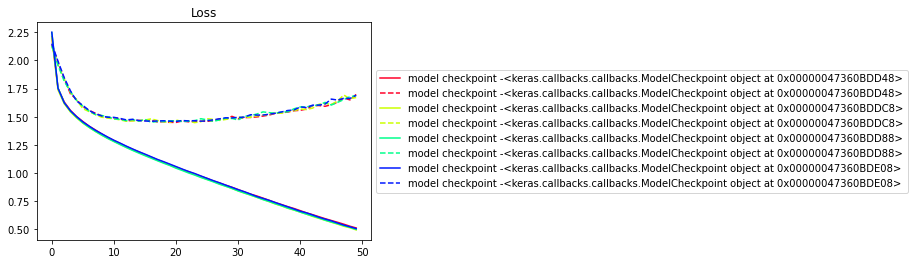

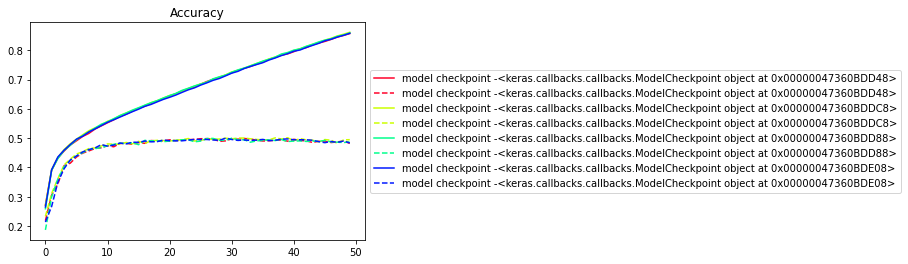

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(6,4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(6,4))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [40]:
# Reload the weights 

# model = build_mlp(input_shape=x_train.shape[1:])
try:
    model.load_weights('./bestTrue_weightsTrue.h5')
    print("Model loading successful!")
except :    
    print("Model loading failed!")
    
# optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
# model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
print("Test loss: %.6f" %(loss_loadback))
print("Test accuracy: %.6f" %(acc_loadback))
y_load_weights_predict = model.predict(x_test)
print(y_load_weights_predict.shape)
print(y_load_weights_predict)

Model loading successful!
10000/10000 [==============================] - 1s 94us/step
Test loss: 1.448814
Test accuracy: 0.494300
(10000, 10)
[[4.01081238e-03 1.17193580e-01 1.16146185e-01 ... 2.39162846e-03
  7.94860274e-02 9.15970840e-03]
 [6.89056292e-02 1.10931374e-01 1.29051926e-03 ... 3.11916531e-03
  5.09314120e-01 3.01200539e-01]
 [6.13954127e-01 1.59169644e-01 3.63368983e-03 ... 2.96601700e-03
  1.53425783e-01 6.23041578e-02]
 ...
 [4.55702282e-03 1.85044436e-03 4.26539242e-01 ... 4.04655701e-03
  7.13374815e-04 1.64880737e-04]
 [4.86624800e-02 1.57886177e-01 5.26366606e-02 ... 2.98770629e-02
  4.03832905e-02 7.67185017e-02]
 [2.41027046e-02 7.12142559e-03 2.41630152e-02 ... 4.41676825e-01
  1.52162295e-02 2.16814838e-02]]


In [23]:
# Reload the weights 

model = build_mlp(input_shape=x_train.shape[1:])
try:
    model.load_weights('./bestTrue_weightsTrue.h5')
    print("weights loading successful!")
except :    
    print("weights loading failed!")
    
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
print("Test loss: %.6f" %(loss_loadback))
print("Test accuracy: %.6f" %(acc_loadback))
y_load_weights_predict = model.predict(x_test)
print(y_load_weights_predict.shape)
print(y_load_weights_predict)

weights loading successful!
10000/10000 [==============================] - 1s 99us/step
Test loss: 1.448814
Test accuracy: 0.494300
(10000, 10)
[[4.01081238e-03 1.17193580e-01 1.16146185e-01 ... 2.39162846e-03
  7.94860274e-02 9.15970840e-03]
 [6.89056292e-02 1.10931374e-01 1.29051926e-03 ... 3.11916531e-03
  5.09314120e-01 3.01200539e-01]
 [6.13954127e-01 1.59169644e-01 3.63368983e-03 ... 2.96601700e-03
  1.53425783e-01 6.23041578e-02]
 ...
 [4.55702282e-03 1.85044436e-03 4.26539242e-01 ... 4.04655701e-03
  7.13374815e-04 1.64880737e-04]
 [4.86624800e-02 1.57886177e-01 5.26366606e-02 ... 2.98770629e-02
  4.03832905e-02 7.67185017e-02]
 [2.41027046e-02 7.12142559e-03 2.41630152e-02 ... 4.41676825e-01
  1.52162295e-02 2.16814838e-02]]


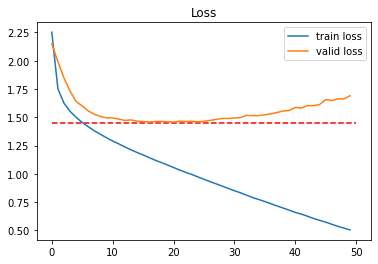

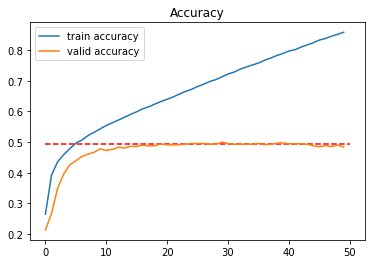

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

In [39]:
# Reload the model

try:
    model = keras.models.load_model('./bestTrue_weightsFalse.h5')
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    print("Model loading successful!")
except :    
    print("Model loading failed!")
    
# loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
print("Test loss: %.6f" %(loss_loadback))
print("Test accuracy: %.6f" %(acc_loadback))
y_load_model_predict = model.predict(x_test)
print(y_load_model_predict.shape)
print(y_load_model_predict)

10000/10000 [==============================] - 1s 103us/step
Model loading successful!
Test loss: 1.446590
Test accuracy: 0.498800
(10000, 10)
[[4.2417510e-03 2.8763914e-02 6.0125063e-03 ... 2.4692118e-03
  2.6198979e-02 8.8199403e-04]
 [1.6369909e-02 2.3425888e-01 4.2187665e-03 ... 1.0215531e-03
  3.7270111e-01 3.6554992e-01]
 [6.1225432e-01 7.2119087e-02 1.1497373e-02 ... 7.9426700e-03
  1.2330438e-01 1.6584741e-01]
 ...
 [1.0041883e-03 1.3368388e-03 1.6979027e-01 ... 1.7196113e-02
  6.1673797e-03 3.6471721e-04]
 [3.3182498e-02 2.5191274e-01 3.8935593e-01 ... 1.3460331e-02
  4.0513952e-03 6.2846363e-02]
 [8.5061371e-02 1.8739818e-02 1.3630979e-01 ... 2.7524388e-01
  2.9775450e-02 1.7760981e-02]]
